In [5]:
import numpy as np
import pandas as pd
import re

In [6]:
df=pd.read_csv("/content/gurgaon_properties_cleaned_v1.csv")
df.head()

,society,price,sector,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,area,property_type
0,ireo victory valley,2.99,sector 67,11832.0,Super Built up area 2527(234.77 sq.m.)Built Up...,3,3,3,servant room,4,East,1 to 5 Year Old,"['AIPL Joy Street Mall', 'Golf Course Extensio...","['3 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 St...","['Security / Fire Alarm', 'Intercom Facility',...",2527.0,flat
1,not applicable,0.42,sector 4,5600.0,Carpet area: 750 (69.68 sq.m.),2,2,1,not available,3,NaN,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Prat...","['4 Wardrobe', '1 Water Purifier', '2 Fan', '1...","['Lift(s)', 'Water purifier', 'Maintenance Sta...",750.0,flat
2,independent,17.00,sector 45,37777.0,Plot area 4500(418.06 sq.m.),5,8,3+,"pooja room,study room,servant room,store room",3,North-East,1 to 5 Year Old,"['Huda city centre metro station', 'Axis bank ...","['1 Water Purifier', '11 Fan', '1 Fridge', '1 ...","['Centrally Air Conditioned', 'Water purifier'...",4500.0,independent-house
3,signature global park,0.68,sohna road,8252.0,Carpet area: 824 (76.55 sq.m.),2,2,2,not available,3,NaN,Within 6 months,"['Sector 55-56 metro', 'Global city centre', '...","['2 Wardrobe', '3 Fan', '3 Light', '1 Modular ...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",824.0,flat
4,dlf new town heights,1.42,sector 90,4864.0,Super Built up area 2364(219.62 sq.m.),4,4,3+,"servant room,store room",8,East,5 to 10 Year Old,"['Manish Gallexie 91', 'NH-8 IMT Manesar', 'RH...",NaN,"['Lift(s)', 'Swimming Pool', 'Park', 'Shopping...",2919.0,flat


In [7]:
df.shape

(3784, 17)

In [8]:
df[['price','area','areaWithType']].sample(6)

,price,area,areaWithType
627,2.29,2096.0,Super Built up area 2100(195.1 sq.m.)
2033,2.01,1546.0,Plot area 1549(143.91 sq.m.)
1159,0.65,1370.0,Super Built up area 1370(127.28 sq.m.)
2988,8.00,300.0,Plot area 300(27.87 sq.m.)
1358,1.40,1447.0,Super Built up area 1720(159.79 sq.m.)Carpet a...
958,1.68,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...


There are three type of area -> 1. super bulit up area  ,2. builtup area,  3. carpet area.
so, we decide to create three different cols using "areaWithTye".


In [9]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['super_built_up_area','built_up_area','carpet_area']].sample(8)

,super_built_up_area,built_up_area,carpet_area
2018,NaN,NaN,NaN
1266,1578.0,NaN,NaN
1454,NaN,NaN,NaN
2986,NaN,915.0,675.0
2085,1578.0,NaN,NaN
2165,NaN,262.0,260.0
3741,NaN,NaN,2054.0
1281,NaN,1523.0,NaN


In [12]:
df.duplicated().sum()

np.int64(121)

In [13]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,17.00,independent-house,4500.0,Plot area 4500(418.06 sq.m.),NaN,NaN,NaN
9,3.75,independent-house,1701.0,Plot area 189(158.03 sq.m.),NaN,NaN,NaN
19,18.00,independent-house,4500.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
24,10.80,independent-house,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,NaN,250.0,200.0
30,6.75,independent-house,2115.0,Plot area 235(196.49 sq.m.),NaN,NaN,NaN


In [15]:
df.isnull().sum()

,0
society,0
price,18
sector,0
price_per_sqft,18
areaWithType,0
bedRoom,0
bathroom,0
balcony,0
additionalRoom,0
floorNum,0


In [16]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]
all_nan_df.shape

(533, 7)

In [17]:
all_nan_df.sample(3)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
176,1.1,independent-house,200.0,Plot area 200(18.58 sq.m.),NaN,NaN,NaN
896,7.0,independent-house,5400.0,Plot area 600(501.68 sq.m.),NaN,NaN,NaN
688,9.0,independent-house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [19]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)
all_nan_df.sample(6)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1835,13.0,independent-house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.0,NaN
2819,3.6,independent-house,1449.0,Plot area 161(134.62 sq.m.),NaN,161.0,NaN
1922,0.8,independent-house,1200.0,Plot area 1200(111.48 sq.m.),NaN,1200.0,NaN
120,4.6,independent-house,1728.0,Plot area 192(160.54 sq.m.),NaN,192.0,NaN
1049,15.5,independent-house,4518.0,Plot area 502(419.74 sq.m.),NaN,502.0,NaN
2755,6.5,independent-house,5400.0,Plot area 5400(501.68 sq.m.),NaN,5400.0,NaN


In [20]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']


all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)
all_nan_df.sample(8)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3163,9.00,independent-house,4680.0,Plot area 520(434.79 sq.m.),NaN,4680.0,NaN
36,2.50,independent-house,963.0,Plot area 107(89.47 sq.m.),NaN,963.0,NaN
3661,2.20,independent-house,909.0,Plot area 101(84.45 sq.m.),NaN,909.0,NaN
1621,4.70,independent-house,2160.0,Plot area 240(200.67 sq.m.),NaN,2160.0,NaN
3285,0.42,independent-house,50.0,Plot area 50(4.65 sq.m.),NaN,50.0,NaN
1514,9.00,independent-house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.0,NaN
174,7.85,independent-house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.0,NaN
3663,1.50,independent-house,1980.0,Plot area 220(183.95 sq.m.),NaN,1980.0,NaN


In [21]:
# update the original dataframe
df.update(all_nan_df)

In [22]:
df.isnull().sum()

,0
society,0
price,18
sector,0
price_per_sqft,18
areaWithType,0
bedRoom,0
bathroom,0
balcony,0
additionalRoom,0
floorNum,0


In [23]:
df['additionalRoom'].value_counts()

,count
additionalRoom,
not available,1576
servant room,704
study room,250
others,225
pooja room,165
...,...
"servant room,pooja room,study room",1
"servant room,study room,others",1
"store room,study room",1


In [24]:
# addtional rooms
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

for col in new_cols:
  df[col]=df['additionalRoom'].str.contains(col).astype(int)

df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
2736,"servant room,others",0,1,0,0,1
1560,servant room,0,1,0,0,0
3126,"servant room,study room,pooja room",1,1,0,1,0
645,store room,0,0,1,0,0
70,servant room,0,1,0,0,0


In [25]:
# agePossession
df['agePossession'].value_counts()

,count
agePossession,
1 to 5 Year Old,1673
5 to 10 Year Old,569
0 to 1 Year Old,529
undefined,332
10+ Year Old,304
Under Construction,88
Within 6 months,70
Within 3 months,26
Dec 2023,22


In [26]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

df['agePossession']=df['agePossession'].apply(categorize_age_possession)
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1673
New Property,625
Moderately Old,569
Undefined,333
Old Property,304
Under Construction,280


In [27]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
2541,"['4 AC', 'No Bed', 'No Chimney', 'No Curtains'...","['Feng Shui / Vaastu Compliant', 'Security / F..."
3487,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No C...","['Power Back-up', 'Feng Shui / Vaastu Complian..."
2789,"['6 AC', 'No Bed', 'No Chimney', 'No Curtains'...","['Feng Shui / Vaastu Compliant', 'Security / F..."
1113,[],"['Power Back-up', 'Intercom Facility', 'Lift(s..."
1006,"['1 Exhaust Fan', '6 Geyser', '8 AC', '1 Modul...","['Feng Shui / Vaastu Compliant', 'Private Gard..."


In [28]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2445438592.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [29]:
furnishings_df.shape

(3784, 19)

In [30]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)
furnishings_df.sample(5)

/tmp/ipython-input-3976408361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


,Wardrobe,Microwave,Sofa,Geyser,Stove,Curtains,Bed,Dining Table,Washing Machine,TV,Fridge,Modular Kitchen,Light,Chimney,Fan,AC,Water Purifier,Exhaust Fan
2187,4,0,0,5,1,0,0,0,0,0,0,1,20,0,7,5,0,1
335,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3224,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
523,5,1,1,5,1,1,2,1,1,0,1,1,21,1,8,0,1,1
1822,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9,0,0


In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
scaled_data=std.fit_transform(furnishings_df)

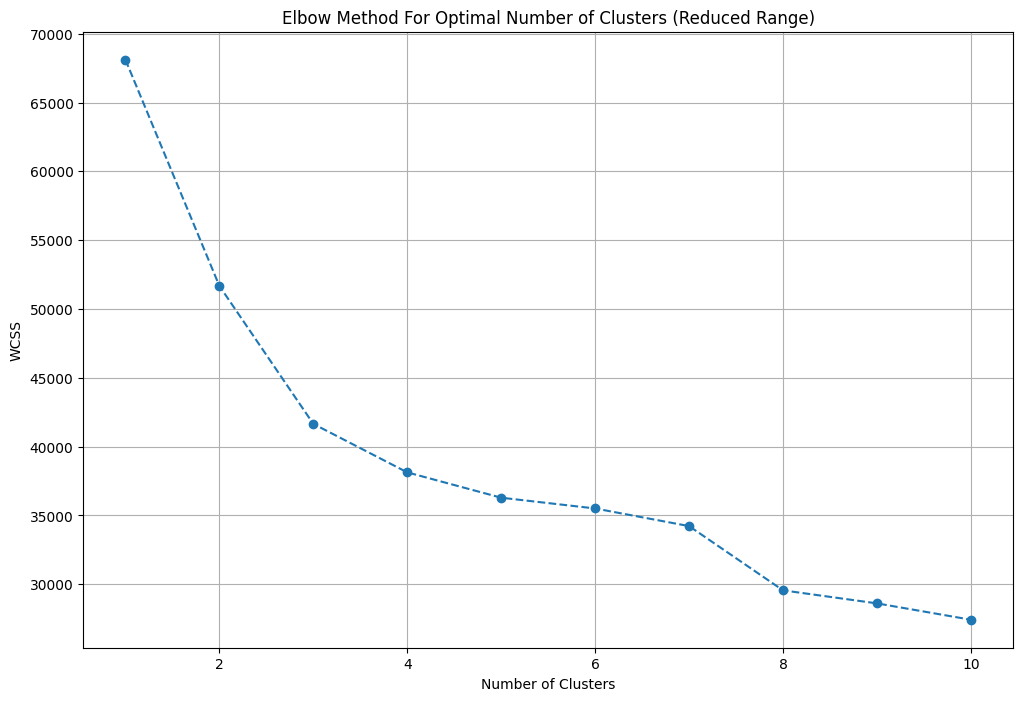

In [34]:
wcss_reduced=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(scaled_data)
  wcss_reduced.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [35]:
n=3
kmeans=KMeans(n_clusters=n,random_state=42)
kmeans.fit(scaled_data)
cluster_data=kmeans.predict(scaled_data)

In [36]:
df=df.iloc[:,:-18]
df.shape

(3784, 25)

In [37]:
df['furnishing_type']=cluster_data
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
3702,NaN,0
1582,"['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '11 L...",2
298,"['3 Wardrobe', '3 Fan', '1 Exhaust Fan', '3 Ge...",2
1323,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...",2
1101,NaN,0


In [44]:
df[['society','features']].sample(5)

,society,features
2123,raheja vedaanta,NaN
1937,ireo victory valley,"['Water purifier', 'Centrally Air Conditioned'..."
1298,gls avenue 51,NaN
3654,central park flower valley,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H..."
3561,ramprastha primera,"['Centrally Air Conditioned', 'Water purifier'..."


In [45]:
df['features'].isnull().sum()

np.int64(626)

In [47]:
app_df=pd.read_csv("/content/appartments.csv")
app_df.sample(7)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
14,SS Linden Floors,"4 BHK Independent Floor in Sector 84, Gurgaon","['Delhi Public School', 'Elan Miracle Mall', '...","{'Delhi Public School': '650 Meters', 'Elan Mi...",https://www.99acres.com/ss-linden-floors-secto...,{'4 BHK': {'building_type': 'Independent Floor...,"['Swimming Pool', 'School', 'Entrance Lobby', ..."
236,Vatika The Seven Lamps,"1, 2, 3, 4, 5 BHK Apartment in Sector 82, Gurgaon","['SS Omnia Mall', 'Nakhrola Stadium', 'Hyatt R...","{'SS Omnia Mall': '3.3 Km', 'Nakhrola Stadium'...",https://www.99acres.com/vatika-the-seven-lamps...,"{'1 BHK': {'building_type': 'Apartment', 'area...","['Valet Parking', 'Swimming Pool', 'School', '..."
65,DLF Gardencity Enclave,"Land, 3 BHK Independent Floor in Sector 93, Gu...","['Gurugram Public School', 'Shikshantar - Prim...","{'Gurugram Public School': '21.5 km', 'Shiksha...",https://www.99acres.com/dlf-gardencity-enclave...,{'3 BHK': {'building_type': 'Independent Floor...,"['Shopping Centre', 'Community Hall', 'Sewage ..."
135,BPTP Fortuna,"Land in Sector 70A, Gurgaon","['Southern Peripheral Rd, Dhani', 'CD Internat...","{'Southern Peripheral Rd, Dhani': '2.6 KM', 'C...",https://www.99acres.com/bptp-fortuna-sector-70...,"{'Land': {'building_type': '', 'area_type': 'P...","['Gazebo', 'Sewage Treatment Plant', 'CCTV Cam..."
115,Emaar Imperial Gardens,"3 BHK Apartment in Sector 102, Gurgaon","['Gurugram Global Heights School', 'Satya The ...",{'Gurugram Global Heights School': '500 Meter'...,https://www.99acres.com/emaar-imperial-gardens...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'School', 'Pergola', 'Wi-Fi ..."
140,Mapsko The Icon 79,"4 BHK Apartment in Sector 79, Gurgaon","['NH 48', 'Sapphire 83 Mall', 'Narayana e-Tech...","{'NH 48': '4.6 KM', 'Sapphire 83 Mall': '6 KM'...",https://www.99acres.com/mapsko-the-icon-79-sec...,"{'4 BHK': {'building_type': 'Apartment', 'area...","['Mini Theatre', 'Swimming Pool', 'Bar/Chill-O..."
200,Conscient Heritage Max,"3, 4 BHK Apartment in Sector 102, Gurgaon","['Gurugram Road', 'Ocus Medley Mall', 'Dwarka ...","{'Gurugram Road': '220 Meter', 'Ocus Medley Ma...",https://www.99acres.com/conscient-heritage-max...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Football', 'Volley Ball Cou..."


In [48]:
app_df['PropertyName']=app_df['PropertyName'].str.lower()
temp_df=df[df['features'].isnull()]
temp_df.shape

(626, 26)

In [55]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']
x.sample(4)

,TopFacilities
97,NaN
137,NaN
68,"['Swimming Pool', 'Volley Ball Court', 'Aerobi..."
472,"['Swimming Pool', 'Reading Lounge', 'Reflexolo..."


In [56]:
df.loc[temp_df.index,'features'] = x.values
df['features'].isnull().sum()


np.int64(472)

In [57]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast


In [59]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,...,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1309,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
74,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,1,0,0


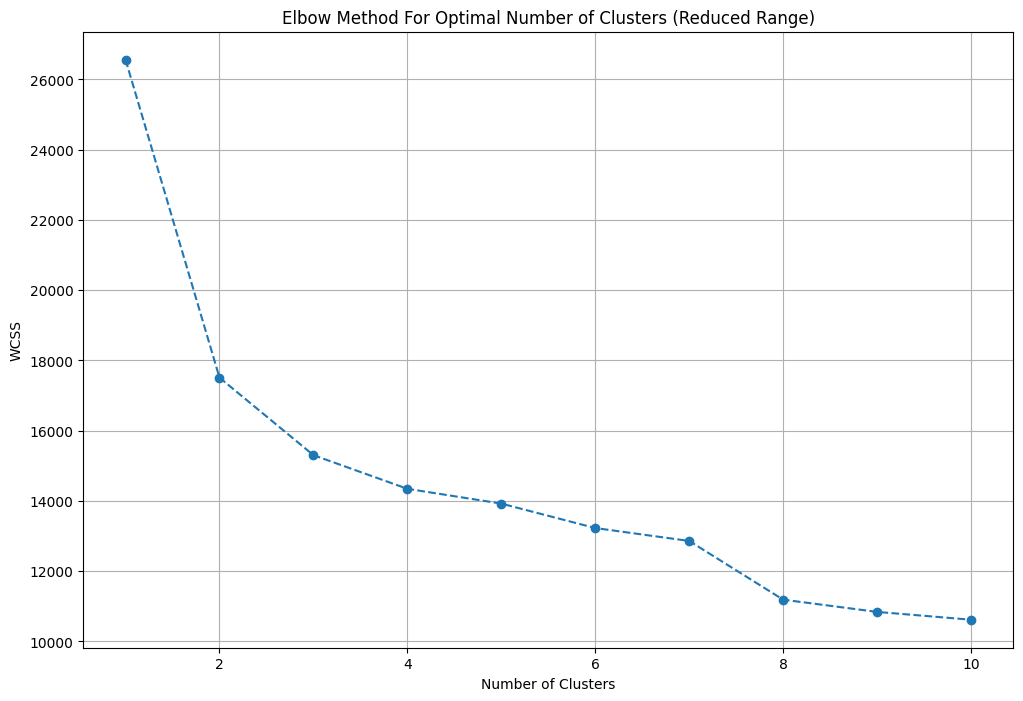

In [60]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [61]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [62]:
df['luxury_score']=luxury_score
df.head()

,society,price,sector,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,ireo victory valley,2.99,sector 67,11832.0,Super Built up area 2527(234.77 sq.m.)Built Up...,3,3,3,servant room,4,...,2200.0,2100.0,0,1,0,0,0,2,"[Security / Fire Alarm, Intercom Facility, Lif...",37
1,not applicable,0.42,sector 4,5600.0,Carpet area: 750 (69.68 sq.m.),2,2,1,not available,3,...,NaN,750.0,0,0,0,0,0,2,"[Lift(s), Water purifier, Maintenance Staff, F...",26
2,independent,17.00,sector 45,37777.0,Plot area 4500(418.06 sq.m.),5,8,3+,"pooja room,study room,servant room,store room",3,...,4500.0,NaN,1,1,1,1,0,1,"[Centrally Air Conditioned, Water purifier, Se...",152
3,signature global park,0.68,sohna road,8252.0,Carpet area: 824 (76.55 sq.m.),2,2,2,not available,3,...,NaN,824.0,0,0,0,0,0,0,"[Security / Fire Alarm, Feng Shui / Vaastu Com...",113
4,dlf new town heights,1.42,sector 90,4864.0,Super Built up area 2364(219.62 sq.m.),4,4,3+,"servant room,store room",8,...,NaN,NaN,0,1,1,0,0,0,"[Lift(s), Swimming Pool, Park, Shopping Centre...",31


In [63]:
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [64]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)